# EDA

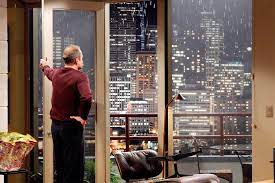

In [29]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [30]:
df_sales = pd.read_csv('eda_sales.csv')
df_sales.describe()

,price,house_id,id
count,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,10799.000
std,367368.140,2876735715.748,6234.661
min,78000.000,1000102.000,1.000
25%,322000.000,2123049175.000,5400.000
50%,450000.000,3904930410.000,10799.000
75%,645000.000,7308900490.000,16198.000
max,7700000.000,9900000190.000,21597.000


In [31]:
df_details = pd.read_csv('eda_details.csv')
df_details.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,19060.000,21357.000,21420.000,21420.000,21420.000,20969.000,21420.000,17609.000,21420.000,21420.000,21420.000,21420.000,21420.000
mean,4580939869.158,3.374,2.118,2083.133,15128.038,1.496,0.008,0.235,3.411,7.663,1791.170,292.087,1971.093,838.806,98077.874,47.560,-122.214,1988.384,12775.718
std,2876761172.448,0.925,0.769,918.808,41530.797,0.540,0.087,0.766,0.650,1.172,828.693,442.696,29.387,4005.127,53.477,0.139,0.141,685.537,27345.622
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123537386.750,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1200.000,0.000,1952.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904921185.000,3.000,2.250,1920.000,7614.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900186.250,4.000,2.500,2550.000,10690.500,2.000,0.000,0.000,4.000,8.000,2220.000,560.000,1997.000,0.000,98117.000,47.678,-122.125,2370.000,10086.250
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


**Here I start working with the joined table**

In [32]:
df = pd.read_csv("king_county_joined.csv") #joined table from house_id
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,date
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,221900.000,2014-10-13
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,538000.000,2014-12-09
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,180000.000,2015-02-25
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,604000.000,2014-12-09
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,510000.000,2015-02-18


In [33]:
print(df['waterfront'].unique())
print(df['view'].unique())
print(df['condition'].unique())
print(df['grade'].unique())
print(df['zipcode'].unique())

[nan  0.  1.]
[ 0. nan  3.  4.  2.  1.]
[3 5 4 1 2]
[ 7  6  8 11  9  5 10 12  4  3 13]
[98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]


**Understanding the data: basic stats**

Median price: $450,000

→ That is likely close to what “limited budget” should aim for.

75% percentile: $645,000

→ For waterfront, many will be more expensive.

Waterfront mean = 0.008 → less than 1% houses are waterfront

→ VERY rare, so your map will show them clustered only along the coastline.

In [34]:
df.describe()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000


**Cleaning the data**
1. fix wrong years
2. convert floats to integers
3. Handling missing values

In [59]:
df[df['yr_renovated'] > 2025]['yr_renovated'].unique()
df['yr_renovated'] = df['yr_renovated'].apply(
    lambda x: int(str(x)[:-1]) if x > 2025 and len(str(x)) == 5 else x
)

df[df['yr_renovated'] > 2025]['yr_renovated'].unique()

array([19910., 20020., 20100., 19920., 20130., 19940., 19780., 20050.,
       20030., 19840., 19540., 20140., 20110., 19830., 19450., 19900.,
       19880., 19770., 19810., 19950., 20000., 19990., 19980., 19700.,
       19890., 20040., 19860., 20070., 19870., 20060., 19850., 20010.,
       19800., 19710., 19790., 19970., 19500., 19690., 19480., 20090.,
       20150., 19740., 20080., 19680., 20120., 19630., 19510., 19620.,
       19530., 19930., 19960., 19550., 19820., 19560., 19400., 19760.,
       19460., 19750., 19640., 19730., 19570., 19590., 19600., 19670.,
       19650., 19340., 19720., 19440., 19580.])

In [35]:
int_cols = [
    'bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view',
    'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
    'zipcode', 'sqft_living15', 'sqft_lot15'
]

for col in int_cols:
    df[col] = df[col].fillna(0).astype(int)



**Understanding and treating the missing data:**

In [36]:
df.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price               0
date                0
dtype: int64

In [37]:
df[df['sqft_basement'].isna()]['floors'].unique() #can I assume the missing sqft_basement are 1-floor houses? No...

array([], dtype=float64)

In [38]:
df['waterfront']    = df['waterfront'].fillna(0) #missing waterfront probably means it doesn't have a waterfront
df['view']          = df['view'].fillna(0) #missing view probably means it doesn't have a good view
#df['sqft_basement'] = df['sqft_basement'].fillna(0)
df['yr_renovated']  = df['yr_renovated'].fillna(0) #missing = “never renovated”, so I also set it to zero

**Start plotting useful stuff:**

<Axes: ylabel='Frequency'>

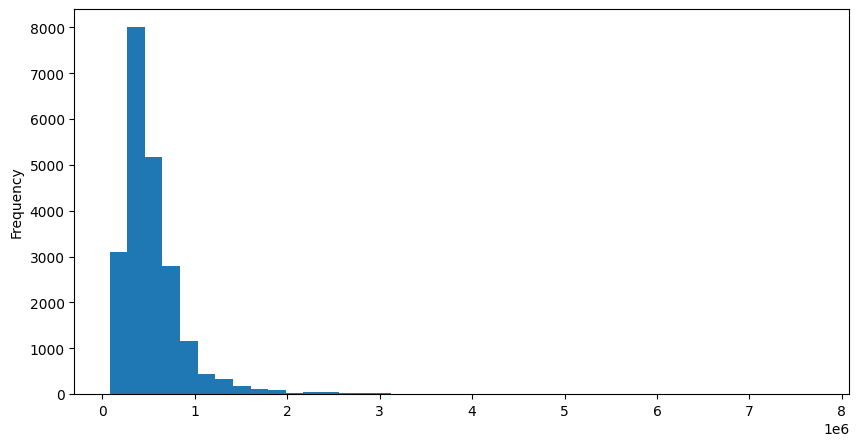

In [39]:
df['price'].plot(kind='hist', bins=40, figsize=(10,5))


Text(0, 0.5, 'Number of houses')

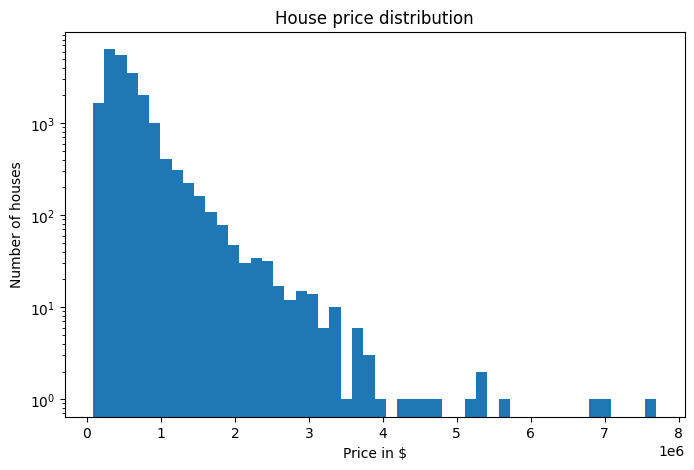

In [40]:
df['price'].plot(kind='hist', bins=50, log=True)
plt.title("House price distribution")
plt.xlabel("Price in $")
plt.ylabel("Number of houses")

In [41]:
df['waterfront'].value_counts() #there are 146 houses with waterfronts



waterfront
0    21451
1      146
Name: count, dtype: int64

Text(0, 0.5, 'Price in $')

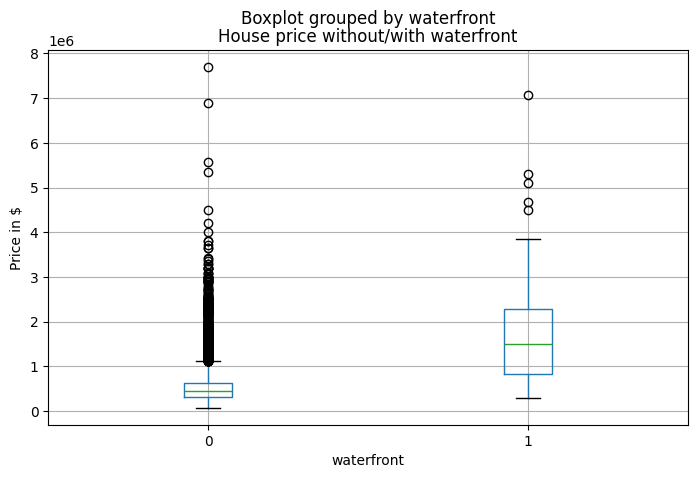

In [42]:
df.boxplot(column='price', by='waterfront', figsize=(8,5)) #compare prices by waterfront or not. This helps your client understand the price penalty of wanting waterfront.
plt.title("House price without/with waterfront")
plt.xlabel("waterfront")
plt.ylabel("Price in $")

In [62]:
df_no_out = df[df['price'] <= 4_000_000] #removing outliers
df_no_out.groupby("waterfront")["price"].median()


waterfront
0    450000.000
1   1400000.000
Name: price, dtype: float64

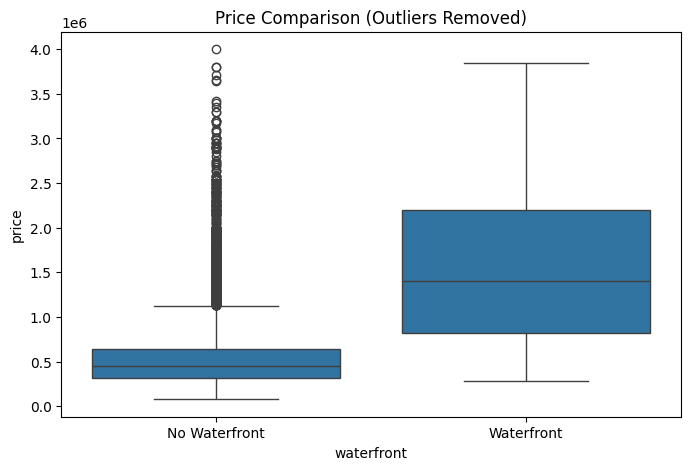

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_no_out, x="waterfront", y="price")
plt.xticks([0,1], ["No Waterfront", "Waterfront"])
plt.title("Price Comparison (Outliers Removed)")
plt.show()


Text(0.5, 1.0, 'House map')

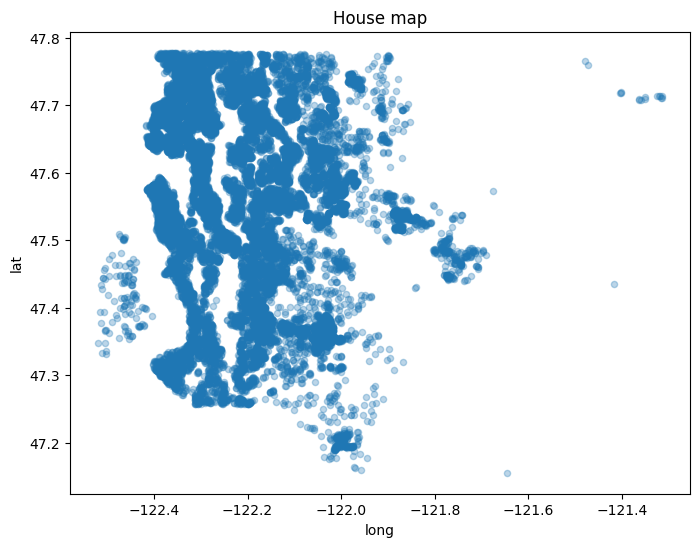

In [43]:
df.plot.scatter(x='long', y='lat', alpha=0.3, figsize=(8,6))
plt.title("House map")


Text(0.5, 1.0, 'House map with price distribution')

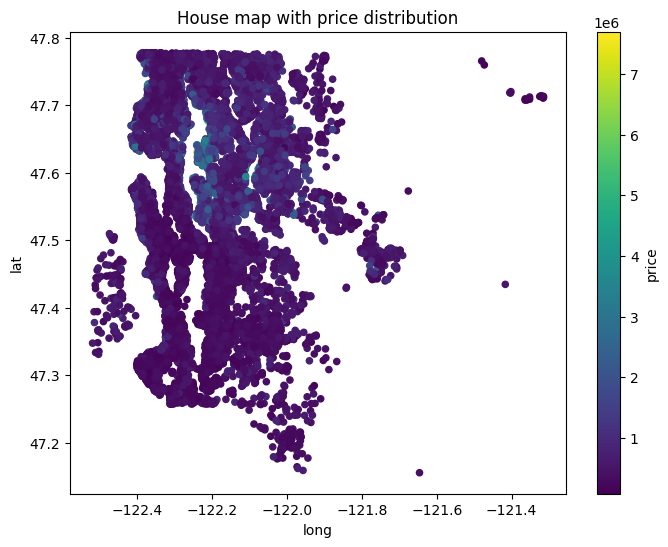

In [44]:
df.plot.scatter(x='long', y='lat', c='price', cmap='viridis', figsize=(8,6))
plt.title("House map with price distribution")

In [ ]:
zip_isolation = df.groupby("zipcode")["sqft_lot15"].median().sort_values(ascending=False)
zip_isolation.head(10) #top 10 most isolated neighbourhoods


zipcode
98024   44197.500
98070   40510.000
98077   37038.000
98014   21881.000
98010   18963.000
98039   16582.500
98072   15000.000
98040   11664.500
98005   11623.500
98045   11560.000
Name: sqft_lot15, dtype: float64

In [ ]:
zip_price = df.groupby("zipcode")["price"].median() #median price per zipcode
zip_compare = pd.DataFrame({
    "median_price": zip_price,
    "median_isolation": zip_isolation
}).dropna()

zip_compare.sort_values("median_isolation", ascending=False).head(10)


,median_price,median_isolation
zipcode,,
98024,462500.000,44197.500
98070,465000.000,40510.000
98077,652475.000,37038.000
98014,415000.000,21881.000
98010,359999.500,18963.000
98039,1895000.000,16582.500
98072,515000.000,15000.000
98040,993750.000,11664.500
98005,765475.000,11623.500


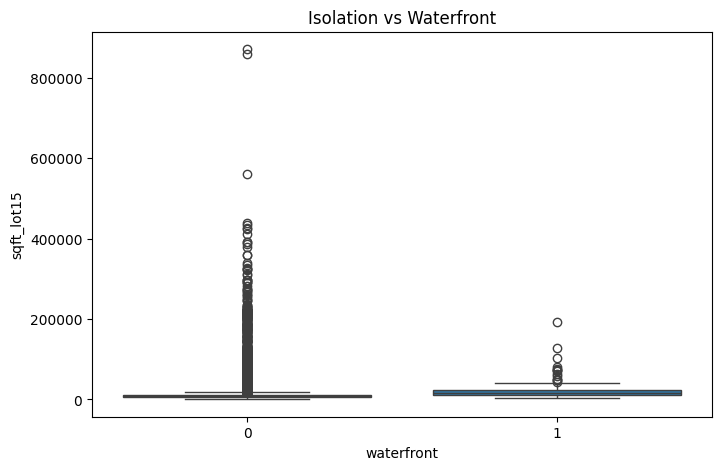

In [ ]:
sns.boxplot(data=df_no_out, x="waterfront", y="sqft_lot15")
plt.title("Isolation vs Waterfront")
plt.show()

#the plot is not very beautiful because we should eliminate some outliers, but we can see that houses without waterfront have more isolation.


**House characteristics**

<Axes: title={'center': 'price'}, xlabel='bedrooms'>

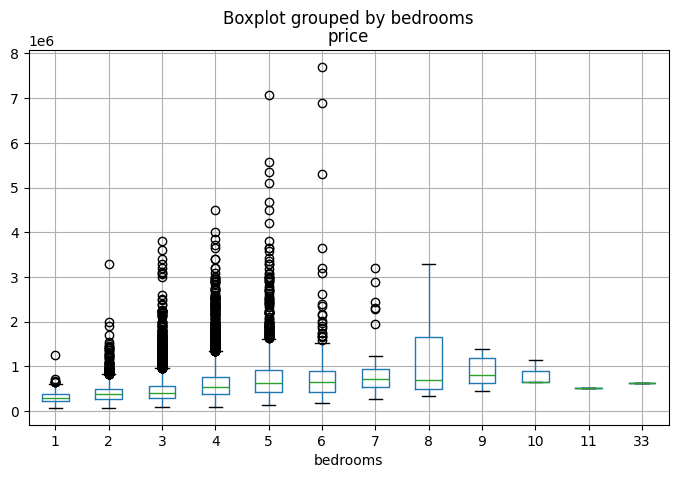

In [45]:
df.boxplot(column='price', by='bedrooms')


<Axes: xlabel='sqft_living', ylabel='price'>

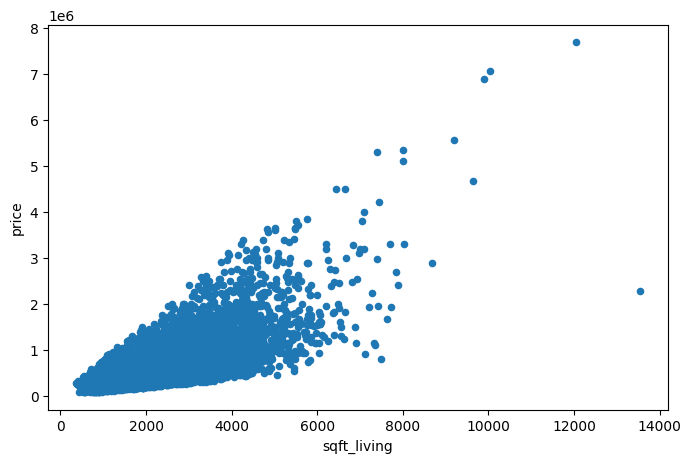

In [46]:
df.plot.scatter(x='sqft_living', y='price')


In [47]:
df.groupby('zipcode')['price'].median()


zipcode
98001    260000.000
98002    235000.000
98003    267475.000
98004   1150000.000
98005    765475.000
            ...    
98177    554000.000
98178    278277.000
98188    264000.000
98198    265000.000
98199    689800.000
Name: price, Length: 70, dtype: float64

**Let's create a new dataframe with my client's filters**

In [48]:
df_client = df[
    (df['waterfront'] == 1) &
    (df['price'] <= 500000) &
    (df['bedrooms'] <= 3)
]
df_client.shape
df_client.head(11)



,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,date
264,2123039032,1,0.750,760,10079,1.000,1,4,5,5,...,0,1936,0.000,98070,47.468,-122.438,1230,14267,369900.000,2014-10-27
1166,3523029041,2,0.750,440,8313,1.000,1,3,4,5,...,0,1943,0.000,98070,47.434,-122.512,880,26289,290000.000,2014-10-09
1947,1922039062,2,1.500,1008,26487,1.000,1,4,4,6,...,0,1943,20020.000,98070,47.385,-122.479,1132,24079,480000.000,2015-04-20
6096,222029026,2,0.750,1060,48292,1.000,1,2,5,6,...,500,1947,0.000,98070,47.428,-122.511,750,80201,340000.000,2014-09-17
8270,221029019,3,2.500,2090,32718,2.000,1,4,3,7,...,540,1919,0.000,98070,47.334,-122.511,1200,192268,400000.000,2015-04-28
11544,2013802030,3,2.000,2460,53882,1.000,1,4,3,7,...,0,1955,0.000,98198,47.381,-122.325,2660,32625,357000.000,2014-09-11
13512,2013802060,2,1.000,1760,27332,1.000,1,4,4,7,...,460,1951,0.000,98198,47.380,-122.325,2590,16630,500000.000,2014-09-27
14813,2423029009,2,2.000,1494,19271,2.000,1,4,3,7,...,0,1943,19970.000,98070,47.473,-122.497,1494,43583,465000.000,2014-06-17
18261,2781600195,1,1.000,1060,54846,1.000,1,4,3,5,...,0,1935,0.000,98070,47.472,-122.445,2258,31762,285000.000,2014-11-17
18833,7631800110,3,2.500,1980,17342,2.000,1,4,3,10,...,400,1984,0.000,98166,47.455,-122.373,2060,17313,380000.000,2014-09-18


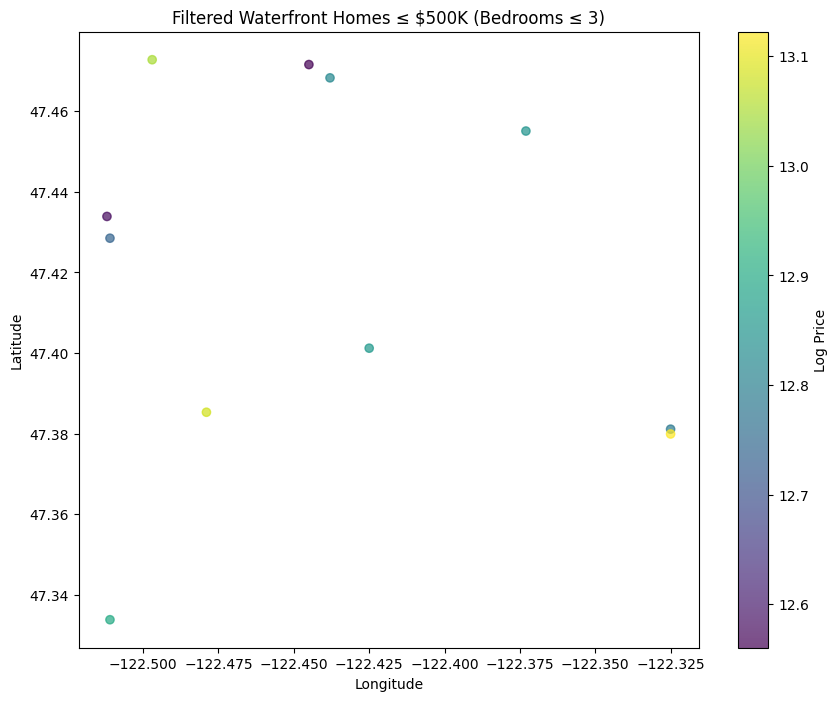

In [49]:
df_client2 = df_client.copy()
df_client2['log_price'] = np.log(df_client['price'])


plt.figure(figsize=(10,8))
plt.scatter(
    df_client2['long'],
    df_client2['lat'],
    c=df_client2['log_price'],
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(label='Log Price')
plt.title("Filtered Waterfront Homes ≤ $500K (Bedrooms ≤ 3)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


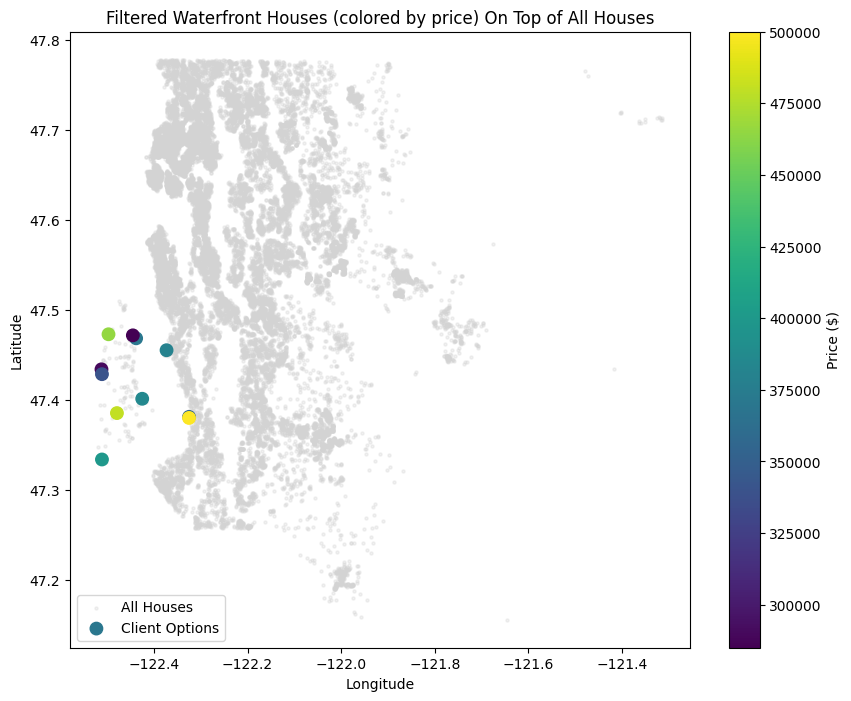

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# 1) All houses in gray
plt.scatter(
    df['long'], df['lat'],
    color="lightgray", alpha=0.3, s=5,
    label="All Houses"
)

# 2) Client houses in color with price legend
scatter = plt.scatter(
    df_client2['long'], df_client2['lat'],
    c=df_client2['price'],
    cmap="viridis",
    s=80,
    label="Client Options"
)

plt.colorbar(scatter, label="Price ($)")
plt.legend()
plt.title("Filtered Waterfront Houses (colored by price) On Top of All Houses")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


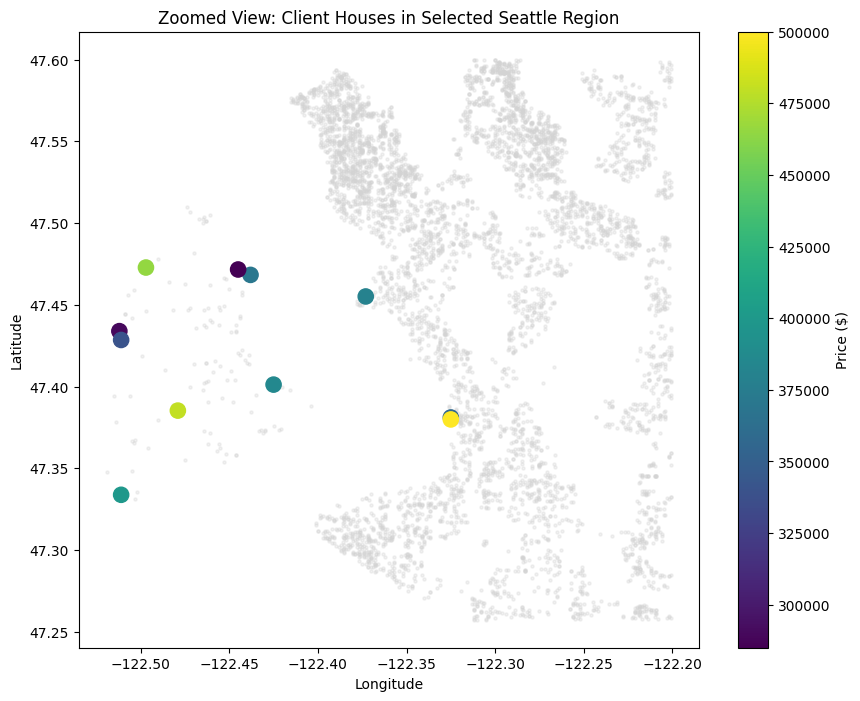

In [51]:
plt.figure(figsize=(10, 8))

# All houses in gray (but only in the zoom range)
df_zoom = df[
    (df['lat'] > 47.2) & (df['lat'] < 47.6) &
    (df['long'] > -122.6) & (df['long'] < -122.2)
]

plt.scatter(df_zoom['long'], df_zoom['lat'],
            color="lightgray", alpha=0.3, s=5)

# Client houses (only those inside the range)
df_client_zoom = df_client2[
    (df_client2['lat'] > 47.2) & (df_client2['lat'] < 47.6) &
    (df_client2['long'] > -122.6) & (df_client2['long'] < -122.2)
]

scatter = plt.scatter(
    df_client_zoom['long'], df_client_zoom['lat'],
    c=df_client_zoom['price'], cmap='viridis', s=120
)

plt.colorbar(scatter, label="Price ($)")

plt.title("Zoomed View: Client Houses in Selected Seattle Region")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [52]:
#cols_to_int = [
 #   "bedrooms", "sqft_living", "sqft_lot",
  #  "waterfront", "view", "condition", "grade", "sqft_above",
   # "sqft_basement", "yr_built", "yr_renovated", "zipcode",
    #"sqft_living15", "sqft_lot15", "price"
] #this converts relevant columns to integers otherwise Excel freaks out

#for col in cols_to_int:
 #   df_client2[col] = df_client2[col].astype("Int64")



df_table = df_client2[[
    'id', 'price', 'bedrooms', 'sqft_living', 'zipcode', 'sqft_lot15'
]].copy()

df_table = df_table.rename(columns={
    'sqft_lot15': 'neighbor_lot_size'
})

df_table


SyntaxError: unmatched ']' (1036885.py, line 6)